# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
indx_list = [*range(1,599)]
city_list=[]
random.shuffle(indx_list)
for j in range(0,len(indx_list)):
    city_list.append(cities[indx_list[j]].capitalize())


In [4]:
weather_api_key

'757587e0b8932ab68204e1935cbf5671'

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=757587e0b8932ab68204e1935cbf5671&units=imperial&q='

In [6]:
response=requests.get(query_url+'yjaris').json()
a1=response.keys()
list(a1)
response

{'cod': '404', 'message': 'city not found'}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
temp=[]
wind=[]
hum=[]
cld=[]
lon=[]
lat=[]
cit=[]
for city in city_list:
    try:
        response = requests.get(query_url + city).json()
        print(city,response['id'])
        
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cld.append(list(response['clouds'].values())[0])
        lon.append(list(response['coord'].values())[0])
        lat.append(list(response['coord'].values())[1])
        cit.append(city)
    except:
        print("city not found")
        pass
    

Bambous virieux 1106677
Hamilton 4513583
Rognan 3141548
Tianpeng 1792916
Pochutla 3517970
Matao 3457509
Ponta do sol 2264557
Mudgee 2156404
Faanui 4034551
Shigony 494531
city not found
Mogadishu 53654
Cherdyn 569359
Pedernales 3495137
city not found
Sioux lookout 6148373
Carutapera 3402648
Touros 3386213
Bahia de caraquez 3660401
Xining 1788852
Samarai 2132606
city not found
Goulburn 2164837
Hornepayne 5977046
Tottori 1849892
Bosilovo 792419
city not found
Morehead 4301317
Svetlogorsk 10722858
Saint-louis 2246451
Gravdal 3155152
Talara 3691582
Havoysund 779622
Lac-megantic 6032673
San remo 6542207
Cherskiy 2126199
Sidi ali 2487130
Pula 3192224
Tongren 1792592
Uyuni 3901903
Sesheke 898905
College 5859699
Gamba 2400547
Farmington 5467328
Umm lajj 100926
Puerto baquerizo moreno 3652758
Nianzishan 2035593
Ilhabela 3461425
Mormugao 1263494
Kurilsk 2123979
San policarpo 1688696
Urambo 149172
city not found
Hofn 2630299
Bowen 2174444
Charters towers 2171722
Jingdezhen 1805680
Sitka 5557293
Br

Artesia 5324862
city not found
Pangkalanbuun 1632694
city not found
Bulnes 3897724
city not found
Urumqi 1529102
Kalmunai 1242110
Jinka 333750
Bilma 2446796
Prince albert 6113335
Sohagpur 1255884
Luderitz 3355672
Bjorkelangen 3161346
Solvychegodsk 490743
city not found
Faya 110690
city not found
Ixtapa 4004293
Tual 1623197
Souillac 933995
Dumai 1645133
Geraldton 2070998
city not found
Khasan 2039557
Sao filipe 3374210
Birao 240210
Norman wells 6089245
Beitbridge 895269
Vadinsk 477418
Quelimane 1028434
Port macquarie 2152659
Warrington 2634739
Bud 4255151
Poum 2138555
Wewak 2083537
Marca 673868
city not found
city not found
city not found
city not found
Bemidji 5017822
Jimo 1805757
city not found
Manacapuru 3663529
Jaisalmer 1269507
Peniche 2264923
Whitehorse 6180550
Olafsvik 3414079
Zemio 235826
Plouzane 2986626
Humaita 3664078
Vinh 1562798
Tchollire 2221607
Platonovka 509104
Edeia 3464363
Acapulco 3533462
Longyearbyen 2729907
Kedrovyy 1538641
Vanimo 2084442
Hovd 1516048
Airai 1651810


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
data = pd.DataFrame({'City':[ i for i in cit],
                     'Lon':[j for j in lon],
                     'Lat':[k for k in lat],
                     'Temp':[h for h in temp],
                     'Humidity':[p for p in hum],
                     'Wind':[w for w in wind],
                     'Cloud':[cl for cl in cld]
       
        
       } )
data


,City,Lon,Lat,Temp,Humidity,Wind,Cloud
0,Bambous virieux,57.76,-20.34,77.00,78,9.17,75
1,Hamilton,-84.53,39.18,32.65,89,2.08,90
2,Rognan,15.39,67.10,23.34,79,38.03,75
3,Tianpeng,103.94,30.99,44.60,81,4.47,40
4,Pochutla,-96.47,15.74,78.98,69,9.17,5
...,...,...,...,...,...,...,...
538,Joshimath,79.57,30.57,30.16,32,7.70,0
539,Japura,102.35,-0.32,83.64,79,0.83,98
540,Oktyabrskiy,53.47,54.48,3.51,95,5.88,96
541,Telimele,-13.33,10.92,67.08,25,1.79,54


In [27]:
data.to_csv("weather_data")

In [ ]:
len(lon)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

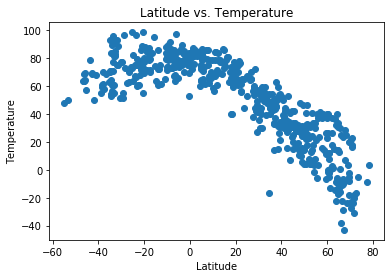

In [78]:
plt.scatter(data['Lat'], data["Temp"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("LatvTemp.png")
plt.show()



#### Latitude vs. Humidity Plot

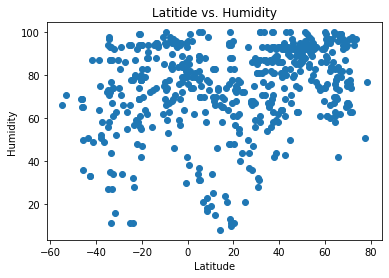

In [74]:
plt.scatter(data['Lat'], data['Humidity'])
plt.title("Latitide vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatvHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

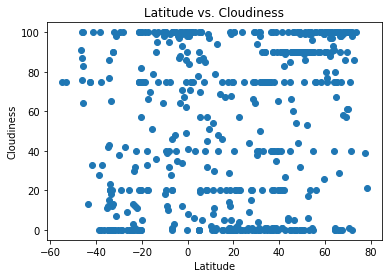

In [77]:
plt.scatter(data['Lat'], data['Cloud'])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatvCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

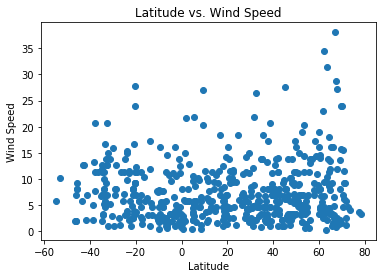

In [107]:
plt.scatter(data['Lat'], data['Wind'])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("LatvWind.png")
plt.show()

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots



In [48]:
# Create Northern and Southern Hemisphere DataFrames
northern_dat=data.loc[data['Lat'] >0]
southern_dat=data.loc[data['Lat']<0]
northern_city=northern_dat["City"]
southern_city=southern_dat["City"]
northern_hum=northern_dat["Humidity"]
southern_hum=southern_dat["Humidity"]
northern_wind=northern_dat["Wind"]
southern_wind=southern_dat["Wind"]
northern_cloud=northern_dat["Cloud"]
southern_cloud=southern_dat["Cloud"]
northern_temp=northern_dat["Temp"]
southern_temp=southern_dat["Temp"]
northern_lat=northern_dat["Lat"]
southern_lat=southern_dat["Lat"]
northern_long=northern_dat["Lon"]
southern_long=southern_dat["Lon"]

In [45]:
northern_dat

,City,Lon,Lat,Temp,Humidity,Wind,Cloud
1,Hamilton,-84.53,39.18,32.65,89,2.08,90
2,Rognan,15.39,67.10,23.34,79,38.03,75
3,Tianpeng,103.94,30.99,44.60,81,4.47,40
4,Pochutla,-96.47,15.74,78.98,69,9.17,5
6,Ponta do sol,-17.10,32.67,55.08,71,2.24,20
...,...,...,...,...,...,...,...
537,Fortuna,-124.16,40.60,50.22,81,3.36,90
538,Joshimath,79.57,30.57,30.16,32,7.70,0
540,Oktyabrskiy,53.47,54.48,3.51,95,5.88,96
541,Telimele,-13.33,10.92,67.08,25,1.79,54


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

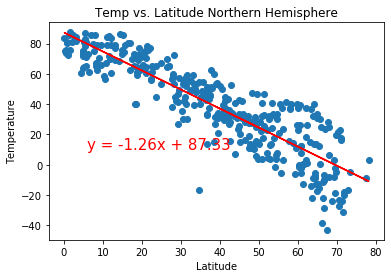

In [99]:
NHTL=pd.DataFrame({"Temperature":[a for a in northern_temp],
                   "Latitude":[b for b in northern_lat]
                    })
y=NHTL["Temperature"]
x=NHTL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.title("Temp vs. Latitude Northern Hemisphere")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

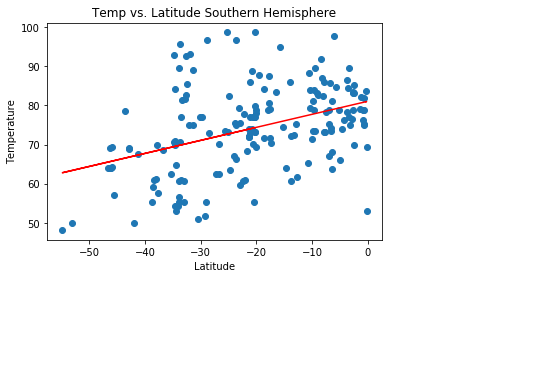

In [100]:
SHTL=pd.DataFrame({"Temperature":[a for a in southern_temp],
                   "Latitude":[b for b in southern_lat]
                    })
y=SHTL["Temperature"]
x=SHTL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.title("Temp vs. Latitude Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

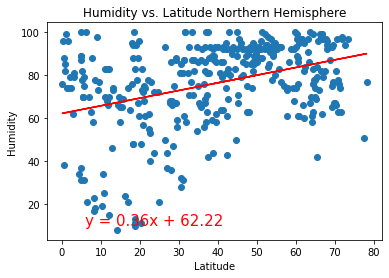

In [101]:
NHHL=pd.DataFrame({"Humidity":[a for a in northern_hum],
                   "Latitude":[b for b in northern_lat]
                    })

y=NHHL["Humidity"]
x=NHHL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Humidity vs. Latitude Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

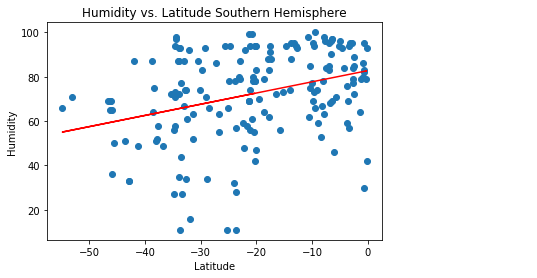

In [102]:
SHHL=pd.DataFrame({"Humidity":[a for a in southern_hum],
                   "Latitude":[b for b in southern_lat]
                    })

y=SHHL["Humidity"]
x=SHHL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Humidity vs. Latitude Southern Hemisphere")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

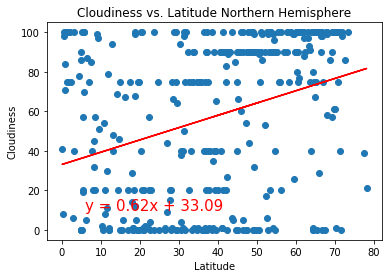

In [103]:
NHCL=pd.DataFrame({"Cloudiness":[a for a in northern_cloud],
                   "Latitude":[b for b in northern_lat]
                    })
y=NHCL["Cloudiness"]
x=NHCL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title("Cloudiness vs. Latitude Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

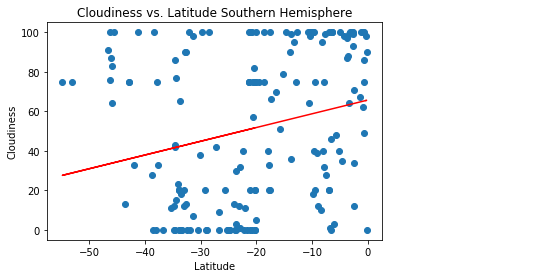

In [104]:
SHCL=pd.DataFrame({"Cloudiness":[a for a in southern_cloud],
                   "Latitude":[b for b in southern_lat]
                    })
y=SHCL["Cloudiness"]
x=SHCL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title("Cloudiness vs. Latitude Southern Hemisphere")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

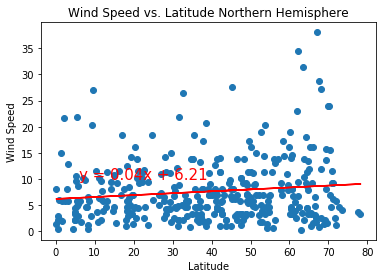

In [105]:
NHWL=pd.DataFrame({"Wind Speed":[a for a in northern_wind],
                   "Latitude":[b for b in northern_lat]
                    })
y=NHWL["Wind Speed"]
x=NHWL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.title("Wind Speed vs. Latitude Northern Hemisphere")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

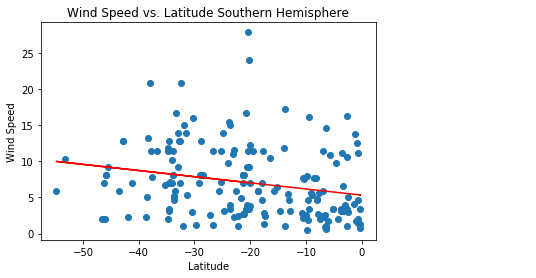

In [106]:
SHWL=pd.DataFrame({"Wind Speed":[a for a in southern_wind],
                   "Latitude":[b for b in southern_lat]
                    })
y=SHWL["Wind Speed"]
x=SHWL["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.title("Wind Speed vs. Latitude Southern Hemisphere")
plt.show()